In [81]:
import flopy
import sys
import os
import pyemu
import pandas as pd
%matplotlib inline
import os
import sys
import pyemu

In [82]:
from swatmf import swatmf_pst_utils, swatmf_viz

In [83]:
import swatmf
swatmf.__version__

'0.2.4'

In [84]:
from swatmf import swatmf_pst_utils

In [85]:
swatmf_pst_utils.create_swatmf_con?

Signature:
swatmf_pst_utils.create_swatmf_con(
    wd,
    sim_start,
    warmup,
    cal_start,
    cal_end,
    subs=None,
    grids=None,
    riv_parm=None,
    baseflow=None,
    time_step=None,
    pp_included=None,
)
Docstring:
create swatmf.con file containg SWAT-MODFLOW model PEST initial settings

Args:
    wd (`str`): SWAT-MODFLOW working directory
    subs (`list`): reach numbers to be extracted
    grids (`list`): grid numbers to be extracted
    sim_start (`str`): simulation start date e.g. '1/1/2000'
    warmup(`int`): warm-up period
    cal_start (`str`): calibration start date e.g., '1/1/2001'
    cal_end (`str`): calibration end date e.g., '12/31/2005'
    time_step (`str`, optional): model time step. Defaults to None ('day'). e.g., 'day', 'month', 'year'
    riv_parm (`str`, optional): river parameter activation. Defaults to None ('n').
    depth_to_water (`str`, optional): extracting simulated depth to water activation. Defaults to None ('n').
    baseflow (`str`, op

In [86]:
#time step
time_step = 'day'
warmup = 0

# locations
subs = [4]
grids = [501]

# calibration period
sim_start = '1/1/2010'
cal_start = '1/1/2010'
cal_end = '12/31/2010'

# working directory
wd = "C:/Users/Ayden/Documents/QGIS/swatmf_pest_zon-main/koki/SWAT-MODFLOW"
swat_wd = "C:/Users/Ayden/Documents/QGIS/swatmf_pest_zon-main/koki/SWAT"

In [87]:
swatmf_pst_utils.create_swatmf_con(wd, sim_start, warmup, cal_start, cal_end, subs, grids)

,names,vals
0,wd,C:/Users/Ayden/Documents/QGIS/swatmf_pest_zon-main/koki/SWAT-MODFLOW
1,sim_start,1/1/2010
2,warm-up,0
3,cal_start,1/1/2010
4,cal_end,12/31/2010
5,subs,[4]
6,grids,[501]
7,riv_parm,n
8,baseflow,n
9,time_step,day


In [88]:
# copy all necessary files (exes) to your working direcotry
swatmf_pst_utils.init_setup(wd, swat_wd)

 Creating 'backup' folder ... passed
 Creating 'echo' folder ... passed
 Creating 'sufi2.in' folder ... passed


In [89]:
# check MODFLOW model
mname = "modflow.mfn"
m = flopy.modflow.Modflow.load(mname,model_ws=wd)
m.check()

Errors and/or Warnings encountered.
Errors and/or Warnings encountered.

modflow MODEL DATA VALIDATION SUMMARY:
  101 Warnings:
    OC package: action(s) defined in OC stress_period_data ignored as they are not part the stress periods defined by DIS
    RCH package: Mean R/T ratio < checker warning threshold of 2e-08 for 33 stress periods
    RIV package: BC in inactive cell

  Checks that passed:
    Unit number conflicts
    Compatible solver package
    DIS package: zero or negative thickness
    DIS package: thin cells (less than checker threshold of 1.0)
    DIS package: nan values in top array
    DIS package: nan values in bottom array
    BAS6 package: isolated cells in ibound array
    BAS6 package: Not a number
    UPW package: zero or negative horizontal hydraulic conductivity values
    UPW package: zero or negative vertical hydraulic conductivity values
    UPW package: negative horizontal anisotropy values
    UPW package: horizontal hydraulic conductivity values below ch

In [90]:
os.chdir(wd)

In [91]:
# pval file
pval_file = 'koki.pval'

In [92]:
gw_par = pyemu.utils.gw_utils.modflow_pval_to_template_file(pval_file, tpl_file=None)
gw_par

,parnme,parval1,tpl
parnme,,,
hk01,hk01,1.00,~ hk01 ~
hk02,hk02,1.00,~ hk02 ~
sy01,sy01,0.01,~ sy01 ~
sy02,sy02,0.01,~ sy02 ~


In [93]:
# model.in file used

sw_par = swatmf_pst_utils.model_in_to_template_file()
sw_par

,parnme,parval1,tpl
parnme,,,
r__CN2.mgt,r__CN2.mgt,0.001,~ CN2 ~
r__SOL_AWC().sol,r__SOL_AWC().sol,0.001,~ SOL_AWC() ~
v__ESCO.hru,v__ESCO.hru,0.001,~ ESCO ~


In [94]:
# extract daily stream discharge
swatmf_pst_utils.extract_day_stf(subs, sim_start, warmup, cal_start, cal_end)

stf_004.txt file has been created...
Finished ...


In [95]:
swatmf_pst_utils.stf_obd_to_ins('stf_004.txt', 'rch04',cal_start, cal_end)

stf_004.txt.ins file has been created...


date
2010-01-01    l1 w !rch04_20100101!
2010-01-02    l1 w !rch04_20100102!
2010-01-03    l1 w !rch04_20100103!
2010-01-04    l1 w !rch04_20100104!
2010-01-05    l1 w !rch04_20100105!
                      ...          
2010-12-27    l1 w !rch04_20101227!
2010-12-28    l1 w !rch04_20101228!
2010-12-29    l1 w !rch04_20101229!
2010-12-30    l1 w !rch04_20101230!
2010-12-31    l1 w !rch04_20101231!
Name: rch04_ins, Length: 365, dtype: object

In [96]:
swatmf_pst_utils.extract_depth_to_water(grids, sim_start, cal_end)

dtw_501.txt file has been created...
Finished ...


C:\Users\Ayden\anaconda3\lib\site-packages\swatmf\swatmf_pst_utils.py:279: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.


In [97]:
swatmf_pst_utils.mf_obd_to_ins('dtw_501.txt', 'g_5699', cal_start, cal_end)

dtw_501.txt.ins file has been created...


date
2010-01-01                        l1
2010-01-02                        l1
2010-01-03                        l1
2010-01-04                        l1
2010-01-05                        l1
                       ...          
2010-12-27    l1 w !g_5699_20101227!
2010-12-28    l1 w !g_5699_20101228!
2010-12-29    l1 w !g_5699_20101229!
2010-12-30    l1 w !g_5699_20101230!
2010-12-31    l1 w !g_5699_20101231!
Freq: D, Name: g_5699_ins, Length: 365, dtype: object

In [98]:
io_files = pyemu.helpers.parse_dir_for_io_files('.')
pst = pyemu.Pst.from_io_files(*io_files)
pyemu.helpers.pst_from_io_files(io_files[0], io_files[1], io_files[2], io_files[3], 'mb_dummy.pst')

noptmax:30, npar_adj:7, nnz_obs:397


In [99]:
par = pst.parameter_data
par

,parnme,partrans,parchglim,parval1,parlbnd,parubnd,pargp,scale,offset,dercom
cn2,cn2,log,factor,1.0,1.100000e-10,1.100000e+10,pargp,1.0,0.0,1
esco,esco,log,factor,1.0,1.100000e-10,1.100000e+10,pargp,1.0,0.0,1
hk01,hk01,log,factor,1.0,1.100000e-10,1.100000e+10,pargp,1.0,0.0,1
hk02,hk02,log,factor,1.0,1.100000e-10,1.100000e+10,pargp,1.0,0.0,1
sol_awc(),sol_awc(),log,factor,1.0,1.100000e-10,1.100000e+10,pargp,1.0,0.0,1
sy01,sy01,log,factor,1.0,1.100000e-10,1.100000e+10,pargp,1.0,0.0,1
sy02,sy02,log,factor,1.0,1.100000e-10,1.100000e+10,pargp,1.0,0.0,1


In [100]:
for i in range(len(par)):
    if (par.iloc[i, 0][:2]) == 'sy':
        par.iloc[i, 6] = 'sy'
    elif par.iloc[i, 0][:7] == 'rivbot_':
        par.iloc[i, 6] = 'rivbot'
    elif par.iloc[i, 0][:6] == 'rivcd_':
        par.iloc[i, 6] = 'rivcd'
    elif par.iloc[i, 0][:2] == 'hk':
        par.iloc[i, 6] = 'hk'
    else:
        par.iloc[i, 6] = 'swat'
print(par)

              parnme partrans parchglim  parval1       parlbnd       parubnd  \
cn2              cn2      log    factor      1.0  1.100000e-10  1.100000e+10   
esco            esco      log    factor      1.0  1.100000e-10  1.100000e+10   
hk01            hk01      log    factor      1.0  1.100000e-10  1.100000e+10   
hk02            hk02      log    factor      1.0  1.100000e-10  1.100000e+10   
sol_awc()  sol_awc()      log    factor      1.0  1.100000e-10  1.100000e+10   
sy01            sy01      log    factor      1.0  1.100000e-10  1.100000e+10   
sy02            sy02      log    factor      1.0  1.100000e-10  1.100000e+10   

          pargp  scale  offset  dercom  
cn2        swat    1.0     0.0       1  
esco       swat    1.0     0.0       1  
hk01         hk    1.0     0.0       1  
hk02         hk    1.0     0.0       1  
sol_awc()  swat    1.0     0.0       1  
sy01         sy    1.0     0.0       1  
sy02         sy    1.0     0.0       1  


In [101]:
count = 0
for i in range(len(par)):
    if (par.iloc[i, 6] == 'hk'):
        par.iloc[i, 3] = 1  
        par.iloc[i, 4] = 1.000000e-02
        par.iloc[i, 5] = 1.000000e+02
    elif (par.iloc[i, 6] == 'sy'):
        par.iloc[i, 3] = 1.000000e-02       
        par.iloc[i, 4] = 1.000000e-04
        par.iloc[i, 5] = 0.6  
    elif (par.iloc[i, 6] == 'rivbot'):
        par.iloc[i, 3] = 3.001     
        par.iloc[i, 4] = 0.001
        par.iloc[i, 5] = 6
        par.iloc[i, 8] = -3
    elif (par.iloc[i, 6] == 'rivcd'):
        par.iloc[i, 3] = 50.001       
        par.iloc[i, 4] = 0.001
        par.iloc[i, 5] = 100
        par.iloc[i, 8] = -50
    else:
        count += 1
count

3

In [102]:
# CN2
par.loc['cn2', 'parval1'] = 1.001
par.loc['cn2', 'parlbnd'] = 0.8
par.loc['cn2', 'parubnd'] = 1.2
par.loc['cn2', 'offset'] = -1

# ESCO
par.loc['esco', 'parval1'] = 1.001
par.loc['esco', 'parlbnd'] = 0.5
par.loc['esco', 'parubnd'] = 1.5
par.loc['esco', 'offset'] = -1

# sol_awc()
par.loc['sol_awc()', 'parval1'] = 1.001
par.loc['sol_awc()', 'parlbnd'] = 0.5
par.loc['sol_awc()', 'parubnd'] = 1.5
par.loc['sol_awc()', 'offset'] = -1


In [103]:
# set observation group
obd = pst.observation_data
obd

,obsnme,obsval,weight,obgnme
g_5699_20101130,g_5699_20101130,-0.802,1.0,obgnme
g_5699_20101201,g_5699_20101201,-0.825,1.0,obgnme
g_5699_20101202,g_5699_20101202,-0.844,1.0,obgnme
g_5699_20101203,g_5699_20101203,-0.851,1.0,obgnme
g_5699_20101204,g_5699_20101204,-0.857,1.0,obgnme
...,...,...,...,...
rch04_20101227,rch04_20101227,6.241,1.0,obgnme
rch04_20101228,rch04_20101228,4.774,1.0,obgnme
rch04_20101229,rch04_20101229,4.168,1.0,obgnme
rch04_20101230,rch04_20101230,3.726,1.0,obgnme


In [104]:
# Change obd group name
for i in range(len(obd)):
    obd.iloc[i, 3] = obd.iloc[i, 0][:-9]
obd

,obsnme,obsval,weight,obgnme
g_5699_20101130,g_5699_20101130,-0.802,1.0,g_5699
g_5699_20101201,g_5699_20101201,-0.825,1.0,g_5699
g_5699_20101202,g_5699_20101202,-0.844,1.0,g_5699
g_5699_20101203,g_5699_20101203,-0.851,1.0,g_5699
g_5699_20101204,g_5699_20101204,-0.857,1.0,g_5699
...,...,...,...,...
rch04_20101227,rch04_20101227,6.241,1.0,rch04
rch04_20101228,rch04_20101228,4.774,1.0,rch04
rch04_20101229,rch04_20101229,4.168,1.0,rch04
rch04_20101230,rch04_20101230,3.726,1.0,rch04


In [105]:
# Streamflow
stf_obd = pd.read_csv('stf_day.obd',
                       sep='\t',
                       index_col = 0,
                       parse_dates = True,
                       na_values=[-999, '']
                     )
stf_obd = stf_obd[cal_start: cal_end]
stf_obd

,rch04
date,
2010-01-01,20.3
2010-01-02,62.5
2010-01-03,27.5
2010-01-04,36.3
2010-01-05,47.7
...,...
2010-12-27,31.8
2010-12-28,25.2
2010-12-29,19.1


In [106]:
# watertable
dtw_obd = pd.read_csv('dtw_day.obd',
                       sep='\t',
                       index_col = 0,
                       parse_dates = True,
                       na_values=[-999, '']
                     )
dtw_obd = dtw_obd[cal_start: cal_end]
dtw_obd

,g_5699,g_5832
date,,
2010-11-27,NaN,-2.758
2010-11-28,NaN,-2.835
2010-11-29,NaN,-2.850
2010-11-30,-0.777,-2.880
2010-12-01,-0.823,-2.850
2010-12-02,-0.838,-2.835
2010-12-03,-0.838,-2.819
2010-12-04,-0.838,-2.813
2010-12-05,-0.838,-2.804


In [107]:
# Get sub list based on obd order
obd_order = []
for i in obd.obgnme.tolist():
    if i not in obd_order:
        obd_order.append(i)
obd_order

['g_5699', 'rch04']

In [108]:
# get total list from each sub obd, delete na vals
tot_obd = []
for i in obd_order[:1]:
    tot_obd += dtw_obd[i].dropna().tolist()
    print(i)
for i in obd_order[1:]:
    tot_obd += stf_obd[i].dropna().tolist()
    print(i)
len(tot_obd)

g_5699
rch04


397

In [109]:
obd.loc[:, 'obsval'] = tot_obd
obd

,obsnme,obsval,weight,obgnme
g_5699_20101130,g_5699_20101130,-0.777,1.0,g_5699
g_5699_20101201,g_5699_20101201,-0.823,1.0,g_5699
g_5699_20101202,g_5699_20101202,-0.838,1.0,g_5699
g_5699_20101203,g_5699_20101203,-0.838,1.0,g_5699
g_5699_20101204,g_5699_20101204,-0.838,1.0,g_5699
...,...,...,...,...
rch04_20101227,rch04_20101227,31.800,1.0,rch04
rch04_20101228,rch04_20101228,25.200,1.0,rch04
rch04_20101229,rch04_20101229,19.100,1.0,rch04
rch04_20101230,rch04_20101230,14.800,1.0,rch04


In [110]:
pst.control_data.noptmax=0
pst.model_command = 'python forward_run.py'

In [34]:
pst.write('mb_pest.pst')

noptmax:0, npar_adj:7, nnz_obs:397


In [35]:
os.chdir(wd)

In [36]:
pst_name = 'mb_pest.pst'
os.system("start cmd /k i64pest {0}".format(pst_name))

0

In [37]:
pst_name_rw = "mb_pest_rw.pst"
contrib = 3003.0

In [38]:
os.system("start cmd /k i64pwtadj1 {0} {1} {2}".format(pst_name, pst_name_rw, contrib))
#os.system("start cmd /k i64pwtadj1 {0}".format(pst_name, pst_name_rw, contrib))

0

In [111]:
swatmf_pst_utils.execute_beopest(wd, pst_name_rw, num_workers=3)

In [113]:
os.chdir(wd)

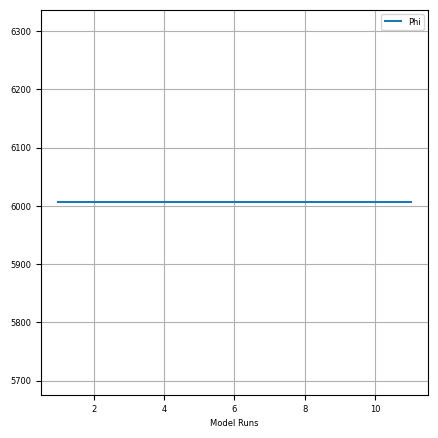

In [114]:
swatmf_viz.phi_progress_plot(pst_name_rw)

In [115]:
pst = pyemu.Pst(os.path.join(wd, pst_name_rw))
pst.phi

5980.36499995998

In [116]:
pst.res.loc[pst.nnz_obs_names,:]

,name,group,measured,modelled,residual,weight,weight*measured,weight*modelled,weight*residual,measurement_sd,natural_weight
name,,,,,,,,,,,
g_5699_20101130,g_5699_20101130,g_5699,-0.777,-0.802,0.025,126.710000,-98.453670,-101.621400,3.167750,0.030971,32.288550
g_5699_20101201,g_5699_20101201,g_5699,-0.823,-0.825,0.002,126.710000,-104.282300,-104.535700,0.253420,0.030971,32.288550
g_5699_20101202,g_5699_20101202,g_5699,-0.838,-0.844,0.006,126.710000,-106.183000,-106.943200,0.760260,0.030971,32.288550
g_5699_20101203,g_5699_20101203,g_5699,-0.838,-0.851,0.013,126.710000,-106.183000,-107.830200,1.647230,0.030971,32.288550
g_5699_20101204,g_5699_20101204,g_5699,-0.838,-0.857,0.019,126.710000,-106.183000,-108.590500,2.407490,0.030971,32.288550
...,...,...,...,...,...,...,...,...,...,...,...
rch04_20101227,rch04_20101227,rch04,31.800,6.241,25.559,0.183397,5.832025,1.144581,4.687444,21.397850,0.046734
rch04_20101228,rch04_20101228,rch04,25.200,4.774,20.426,0.183397,4.621604,0.875537,3.746067,21.397850,0.046734
rch04_20101229,rch04_20101229,rch04,19.100,4.168,14.932,0.183397,3.502883,0.764399,2.738484,21.397850,0.046734


<Figure size 800x1050 with 0 Axes>

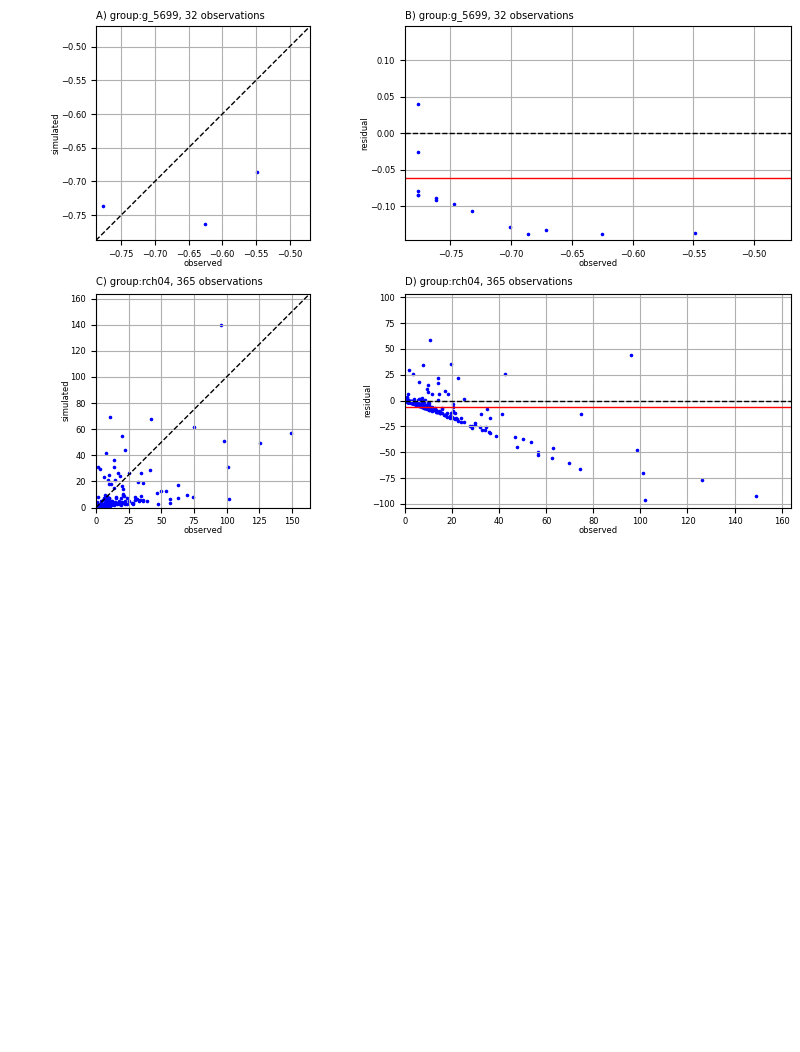

In [117]:
figs = pst.plot(kind="1to1")